In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [7]:
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Bengaluru_House_Data.csv")

# https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv


Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


In [8]:
df.loc[13316]

area_type       Super built-up  Area
availability           Ready To Move
location               Richards Town
size                           4 BHK
society                          NaN
total_sqft                      3600
bath                             5.0
balcony                          NaN
price                          400.0
Name: 13316, dtype: object

### here we use supervised learning , in this we need tag or label data

In [9]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [10]:
df.shape

(13320, 9)

In [11]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [12]:
df2 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# DATA CLEANING

In [13]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df3= df2.dropna()
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df3.shape

(13246, 5)

In [17]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### here we have 4 bedroom and 4BHK both are same so we need to rectify this : for this we create a new column and we store the no of bedrooms in that by removing the string values such as bhk or bedroom





In [18]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(" ")[0]))

In [19]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
df4=df3.drop(['size'],axis='columns')
df4

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [21]:
df4[df4.bhk>20] # 43 bedrooms with in 2400sqt is not possible hence its an error .

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [22]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:

# in order to work with the range data :
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [24]:
df4[~ df4['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [25]:
# import pandas as pd
# import re

# # Sample DataFrame with "total_sqft" column
# data = {'total_sqft': ['1500 Sq. Meter', '4 Perch', '1000 sqft', '1200 Sq. Meter', '2100 - 2850', '34.46 Sq.Meter', '4125 Perch']}
# df = pd.DataFrame(data)

# # Function to convert values to sqft
# def convert_to_sqft(value):
#     value = str(value)  # Ensure the value is a string
#     if "Sq. Meter" in value:
#         sq_meter = float(re.search(r'\d+\.\d+|\d+', value).group())
#         sqft = sq_meter * 10.7639  # 1 Sq. Meter = 10.7639 sqft
#         return sqft
#     elif "Perch" in value:
#         perch = float(re.search(r'\d+\.\d+|\d+', value).group())
#         sqft = perch * 272.25  # 1 Perch = 272.25 sqft
#         return sqft
#     elif "-" in value:  # Handle values like '2100 - 2850'
#         tokens = re.findall(r'\d+\.\d+|\d+', value)
#         if len(tokens) == 2:
#             sqft_range = [float(token) for token in tokens]
#             sqft = sum(sqft_range) / 2
#             return sqft
#     else:
#         try:
#             sqft = float(re.search(r'\d+\.\d+|\d+', value).group())
#             return sqft
#         except:
#             return None

# # Apply the conversion function to the "total_sqft" column
# df3['total_sqft'] = df3['total_sqft'].apply(convert_to_sqft)

# # Print the DataFrame after conversion
# print(df3)


##3 here we can use both the codes : either above code or the below one code

In [26]:
def convert_sqft_to_num(x):
    splits=x.split('-')
    if len(splits)==2:
        return (float(splits[0])+float(splits[1]))/2
    try:
        return float(x)
    except:
        return None




In [27]:
df5 =df4.copy()
df5['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [28]:

df5.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


# FEATURE ENGINEERING  AND DIMENSSIONALITY REDUCTION TECHNEQUES

In [29]:
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [30]:
df5 =  df5.dropna()

In [31]:
df5.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [32]:


# here this line of code help ful for the outlier detection and in the up coming
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [33]:
len(df5.location.unique())

1298

###  here totally we have 1304 no of catagorical data , but we should not use the dummy variables because it resulted in the high dimentionality curse .

In [34]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

In [35]:
location_stats.sort_values(ascending=False)

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [36]:
len(location_stats[location_stats<=10])

1047

In [37]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1047, dtype: int64

In [38]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

# OUTLIER REMOVAL AND OUTLIER DETECTION

### here lets consider that the sqrt per bedroom is 600 and we have 6 rooms so each take 100 sqt but this cant be good . ie  the total arear is only for the bedrooms that cant be happen so these are the outliers . so lets check in out data set for any outliers  

In [39]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 6)

In [40]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-sd))&(subdf.price_per_sqft<(m+sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [42]:
df7=remove_pps_outliers(df6)
df7.shape

(10242, 6)

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 6)

# DATA VISUALIZATION:


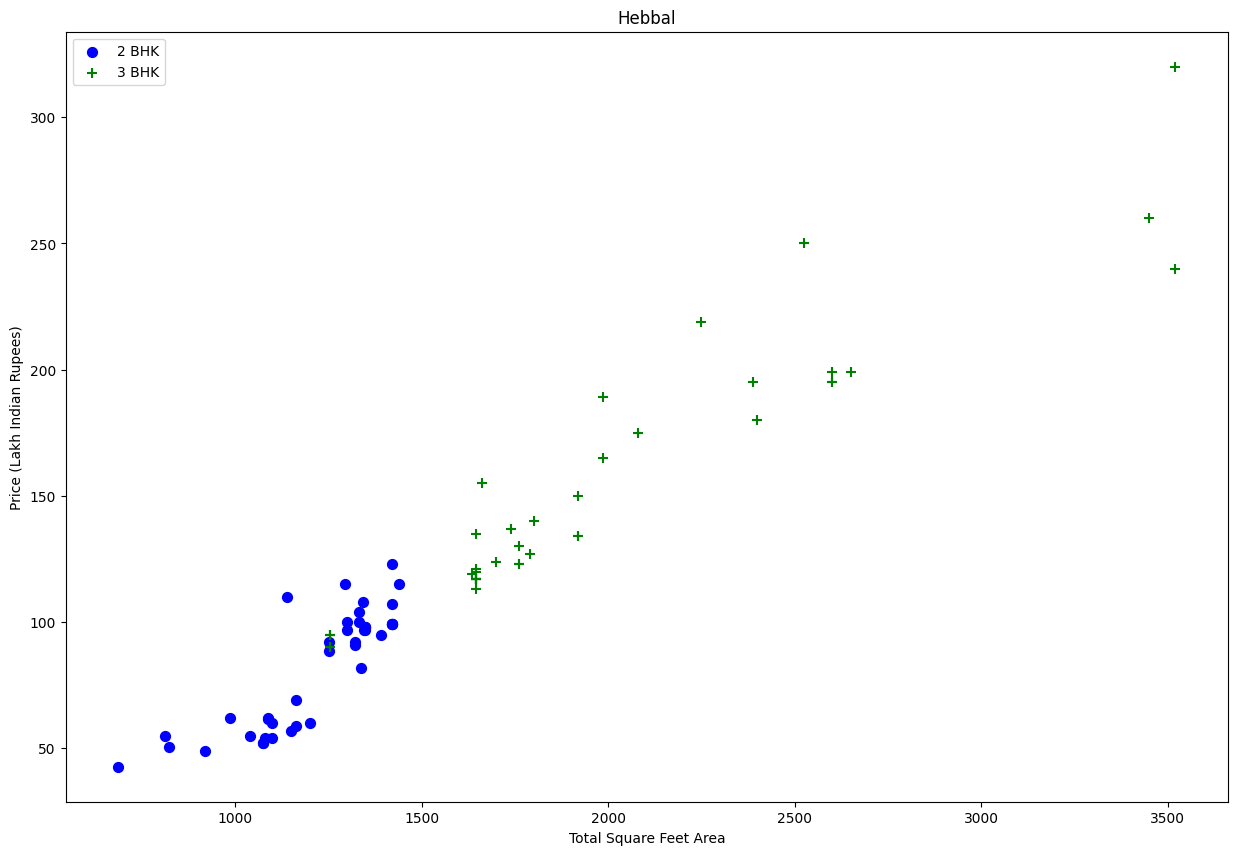

In [44]:
from matplotlib import pyplot as plt


def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df8,"Hebbal")

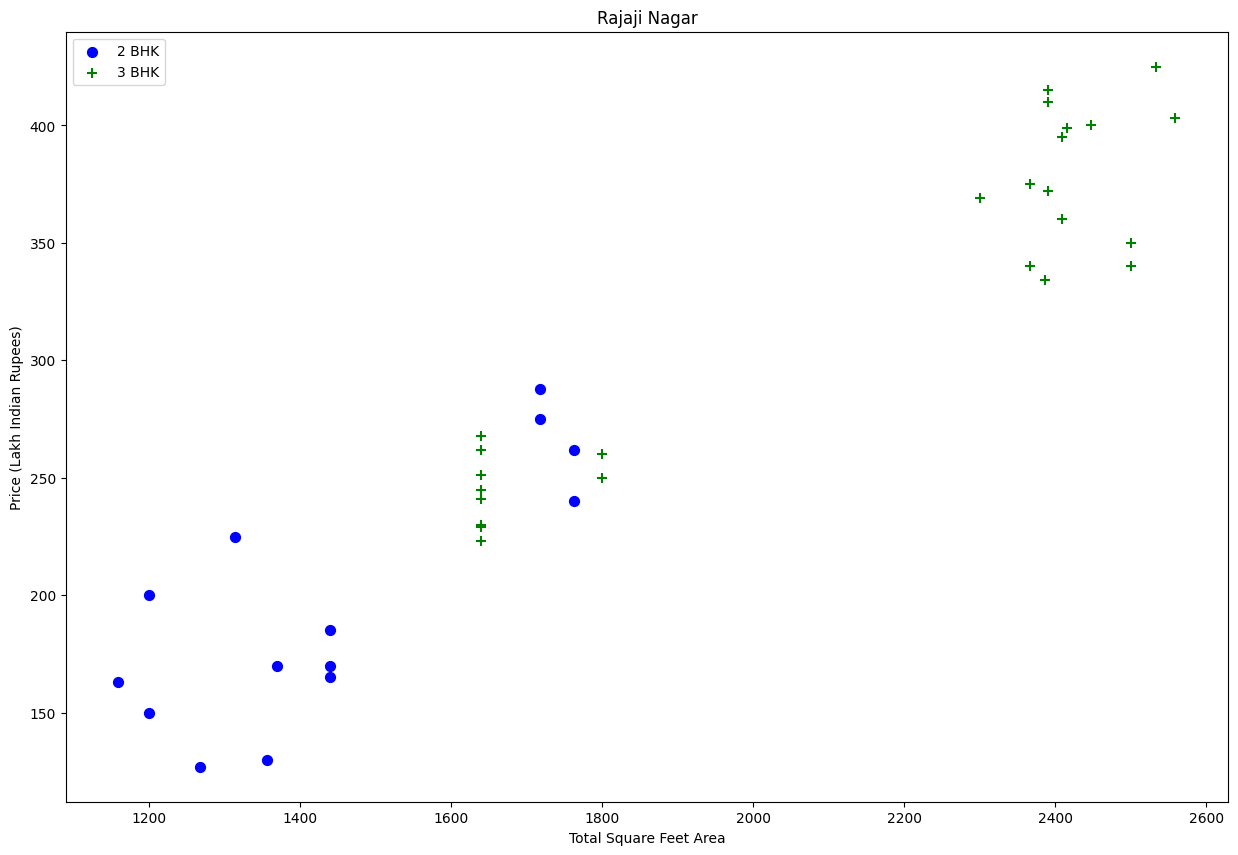

In [45]:
plot_scatter_chart(df8,"Rajaji Nagar")

### here we can c that 2 bedroom apartments are more cost than 3 bedroom apartments . hence this is an outlier .

## this is mainly used to remove the houses whoes bedroom cost is  than mean of lessno of bedroom houses ;

### histogram  to see how many apartments are there for price per area .

Text(0, 0.5, 'Count')

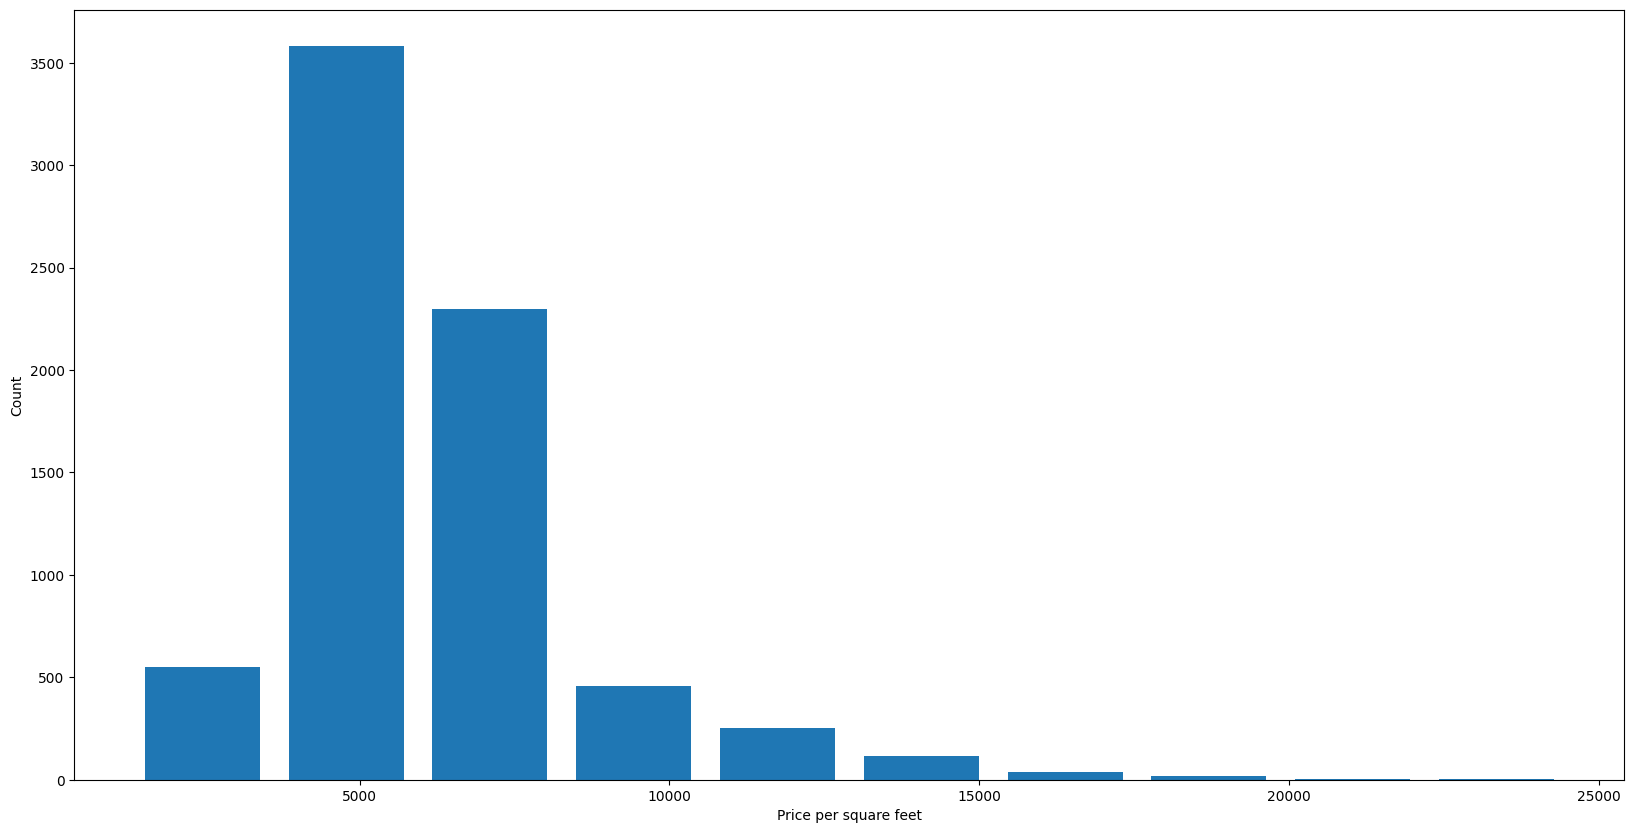

In [46]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel('Count')


In [47]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [48]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8483,other,12000.0,12.0,525.0,10,4375.000000
8572,other,10000.0,16.0,550.0,16,5500.000000
9306,other,6000.0,12.0,150.0,11,2500.000000
9637,other,5425.0,13.0,275.0,13,5069.124424


### here we remove the bathrooms whoes count value is more than the no of bedrooms in the area

Text(0, 0.5, 'Count')

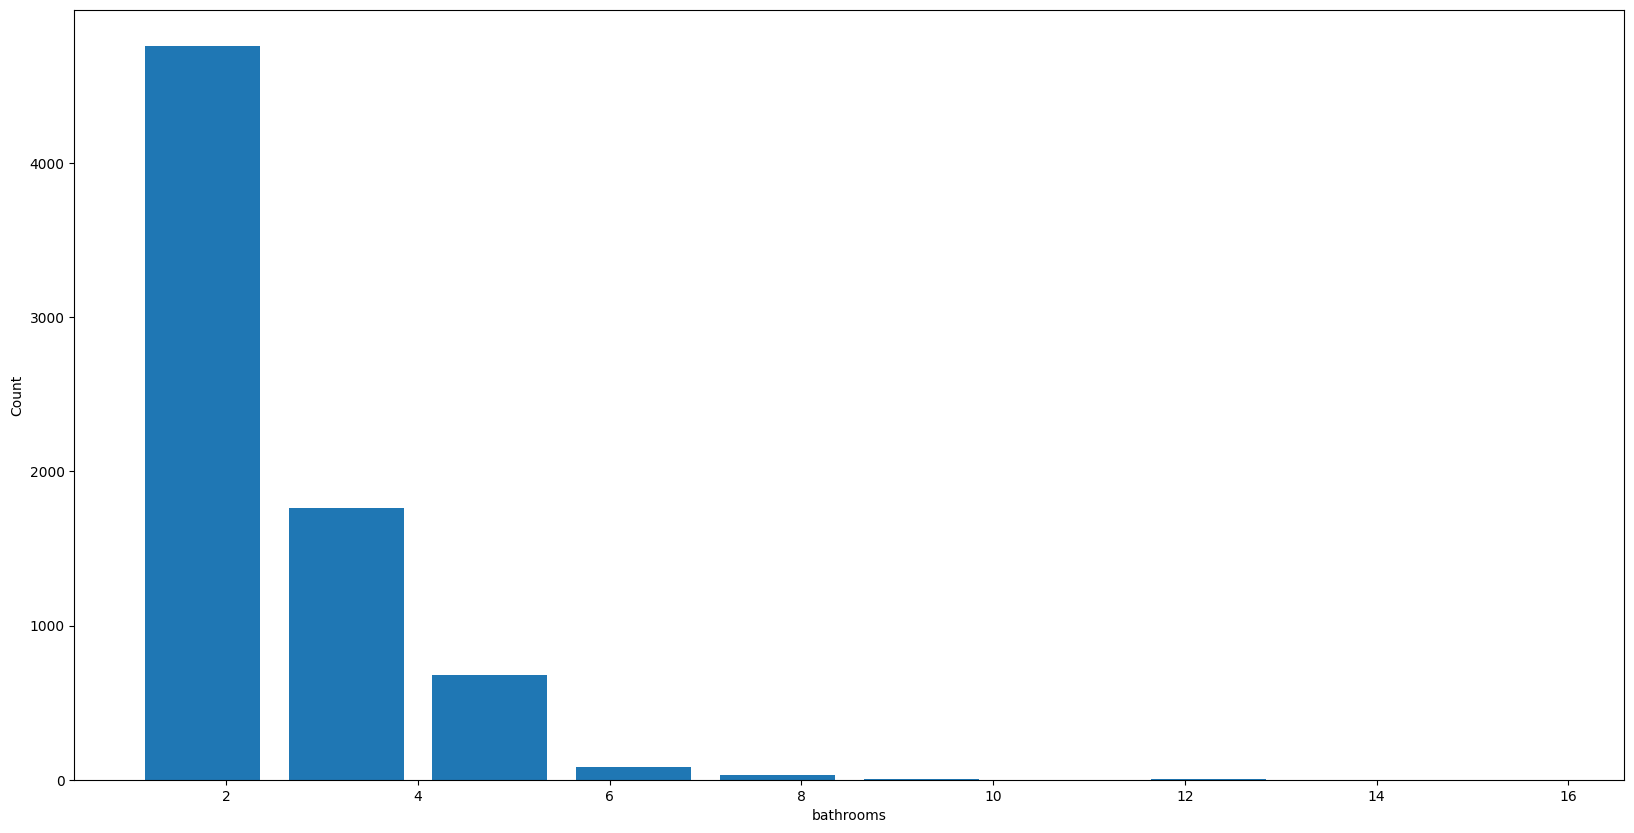

In [49]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("bathrooms")
plt.ylabel('Count')

In [86]:
df8[df8.bath>df8.bhk+2].count()

location          4
total_sqft        4
bath              4
price             4
bhk               4
price_per_sqft    4
dtype: int64

In [51]:
df9=df8[~(df8.bath>df8.bhk+2)]
df9

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2,5833.333333
10234,other,1800.0,1.0,200.0,1,11111.111111
10237,other,1353.0,2.0,110.0,2,8130.081301
10238,other,812.0,1.0,26.0,1,3201.970443


In [52]:
df10=df9.drop(['price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Create the machine learning model

In [53]:
dummies=pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(5)
 # to avoid thedummy variable trap we have to drop one column from the data frame for that we removied the last column.

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df12=df11.drop(['location'],axis='columns')
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
x=df12.drop('price',axis='columns')
x


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y=df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10233     70.0
10234    200.0
10237    110.0
10238     26.0
10241    400.0
Name: price, Length: 7313, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=10)

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

-5.153232708680428e+17

In [60]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=50, max_iter=100, tol=0.1)

In [61]:
lasso_reg.score(x_train,y_train)

0.6537307698337029

In [62]:
lasso_reg.score(x_test,y_test)

0.7093866854037327

In [63]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=50, max_iter=100, tol=0.1)

In [64]:
reg.fit(x_test,y_test)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [65]:
reg.score(x_test,y_test)

0.7710275368184468

In [66]:
reg.score(x_train,y_train)

0.7196185435015506

In [70]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0) # this will randomize the sample each of this will have equal distribution.

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.86801733, 0.84558034, 0.83182627, 0.83917255, 0.86424179])

# grid search cv

In [74]:
from pandas import DataFrame
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, GridSearchCV

def find_best_score_model(x, y):
    algos = {
        'linear_model': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],  # Use fit_intercept instead of normalize
                'n_jobs': [None, 1, 2, 3],
                'positive': [False, True]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [75]:
find_best_score_model(x,y)

,model,best_score,best_params
0,linear_model,0.850332,"{'fit_intercept': False, 'n_jobs': None, 'posi..."
1,lasso,0.701200,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.715088,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [76]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [80]:
np.where(x.columns == 'Yelahanka New Town')[0][0]

240

In [81]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x_train.columns==location)[0][0]
    x=[]
    x=np.zeros(len(x_train.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return reg.predict([x])[0]

In [82]:
predict_price('1st Phase JP Nagar',1000,2,2)

63.01072653841949

In [85]:
predict_price('2nd Stage Nagarbhavi',1000,5,6)

69.86663886465985

In [84]:
predict_price('Indira Nagar',1500,3,3)

144.30264374868116

### lets export the model to the pickle file .

In [89]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
  pickle.dump(reg,f)

In [90]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]

}
with open('columns.json','w') as f:
  f.write(json.dumps(columns))

# THANK YOU